# **DIP HW1**

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from google.colab.patches import cv2_imshow
from google.colab import files

**Q1-Part1**

without opencv

In [ ]:
def calc_hist(image):
  '''
  calculate image histogram
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    hist (ndarray): computed input image histogram
  '''
  hist = np.zeros(256,dtype=int)
  ############
  # Your code
  # Start
  # گردش روی آرایه های ماتریس 
  for i in image:
    for j in i:
     # شمارش مقادیر مختلف سطوح روشنایی و ذخیره آنها روی آرایه هیستوگرام
     hist[j] = hist[j] + 1
  # End
  return hist

 with opencv

In [ ]:
############
# Your code
# Start
img = cv2.imread('img1.jpg',cv2.IMREAD_GRAYSCALE);
cv_hist = cv2.calcHist([img],[0],None,[256],[0,256]);
# End

don't change next cell

Text(0.5, 1.0, 'Opencv histogram')

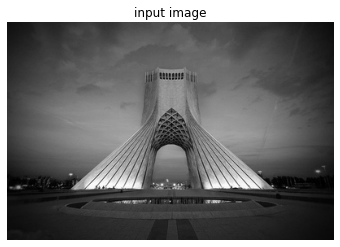

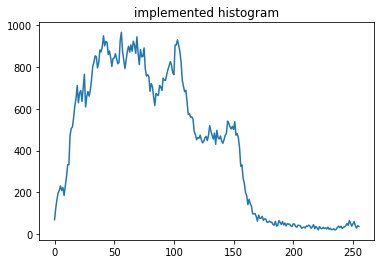

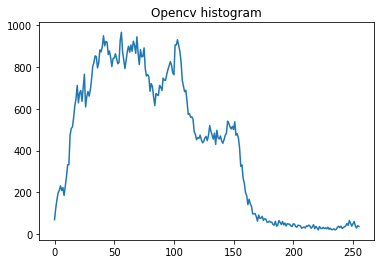

In [ ]:
img = cv2.imread('img1.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.title('input image')
plt.axis('off')
plt.figure()
plt.plot(calc_hist(img))
plt.title('implemented histogram')
plt.figure()
plt.plot(cv_hist)
plt.title('Opencv histogram')

**Q3-Part2**

In [ ]:
def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  ############
  # Your code
  # Start
  # اعمال فرمول کشش هیستوگرام روی ماتریس تصویر
  output_image = (image - np.amin(image))*(255/(np.amax(image)-np.amin(image)));
  # تبدیل مقادیر ماتریس به عدد صحیح
  output_image = output_image.astype(int)
  # End
  return output_image

don't change next cell

Text(0.5, 1.0, 'implemented histogram')

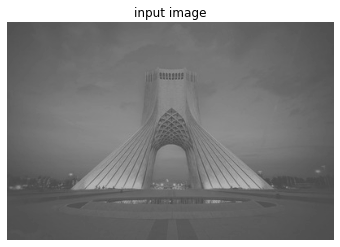

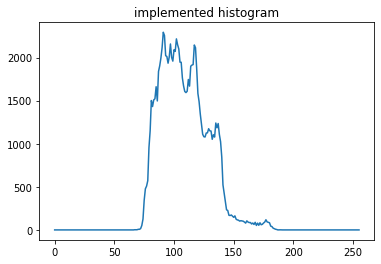

In [ ]:
img2 = cv2.imread('img2.jpg',cv2.IMREAD_GRAYSCALE)
enhanced_image = stretch_hist(img2)
plt.imshow(img2,cmap='gray',vmin=0,vmax=255)
plt.title('input image')
plt.axis('off')
plt.figure()
plt.plot(calc_hist(img2))
plt.title('implemented histogram')

don't change next cell

Text(0.5, 1.0, 'implemented histogram')

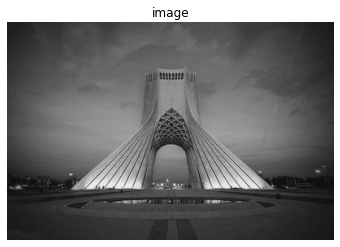

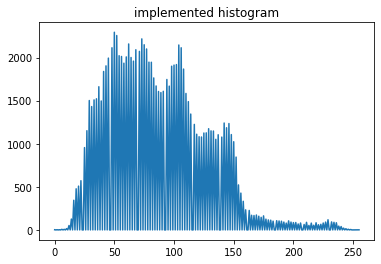

In [ ]:
plt.imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
plt.title('image')
plt.axis('off')
plt.figure()
plt.plot(calc_hist(enhanced_image))
plt.title('implemented histogram')

**Q3-Part3**

In [ ]:
def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''
  output_image = image.copy()
  ############
  # Your code
  # Start
  # محاسبه هیستوگرام تصویر
  hist=calc_hist(image)
  # نرمال کردن هیستوگرام
  normelized_hist=hist*(100/(image.shape[0]*image.shape[1]))
  # پیدا کردن 1 درصد
  f1 = 1
  sum = 0
  for index,i in enumerate(normelized_hist):
    sum=sum+i
    if sum>=1:
      f1=index
      break
  # پیدا کردن 99 درصد
  f99 = 255
  sum = 0
  for index,i in enumerate(normelized_hist):
    sum=sum+i
    if sum>=1:
      f99=len(normelized_hist)-index-1
      break
  # اعمال فرمول برش هیستوگرام
  output_image = (image - f1)*(255/(f99-f1));
  # تبدیل آرایه های ماتریس به عدد صحیح
  output_image = output_image.astype(int)
  # تصویر مقدار های بیشتر از 255 به 255 و مقدار های کمتر از صفر به صفر
  for row in output_image:
   for i,col in enumerate(row):
     if col > 255:
       row[i]=255
     if col < 0:
       row[i]=0
         
  # End
  ############
  return output_image

Text(0.5, 1.0, 'enhanced histogram')

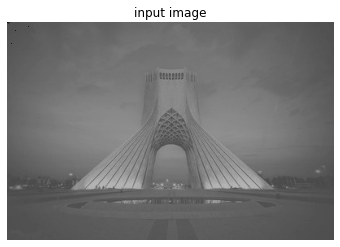

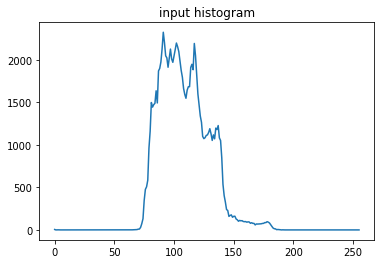

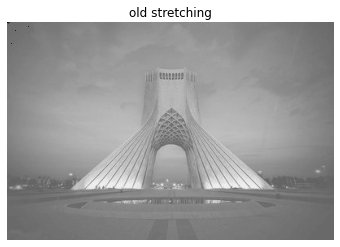

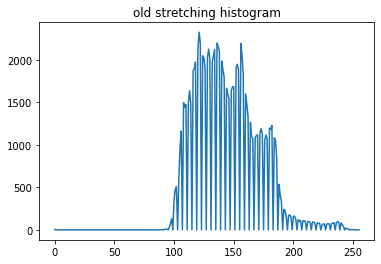

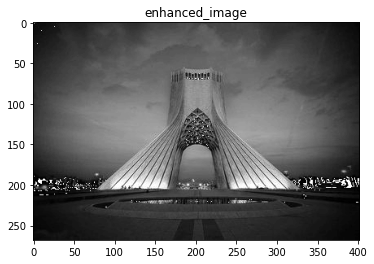

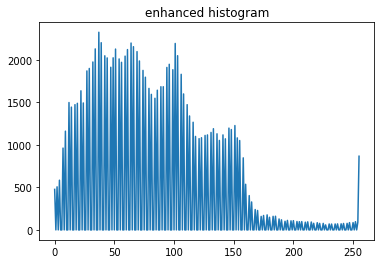

In [ ]:
img3 = cv2.imread('img3.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img3,cmap='gray',vmin=0,vmax=255)
plt.title('input image')
plt.axis('off')
plt.figure()
plt.plot(calc_hist(img3))
plt.title('input histogram')
plt.figure()
plt.imshow(stretch_hist(img3),cmap='gray',vmin=0,vmax=255)
plt.title('old stretching')
plt.axis('off')
plt.figure()
plt.plot(calc_hist(stretch_hist(img3)))
plt.title('old stretching histogram')
plt.figure()
enhanced_image = modified_stretch_hist(img3)
plt.imshow(enhanced_image,cmap='gray',vmin=0,vmax=255)
plt.title('enhanced_image')
plt.figure()
plt.plot(calc_hist(enhanced_image))
plt.title('enhanced histogram')

sources

https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html